# 大作业-2-数据降维

## 导入库

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
color = sns.color_palette()


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
import joblib

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split 

## 数据导入

In [3]:

df = pd.read_csv('abalone_1.csv')
df.head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


In [4]:
df['age'].value_counts()

age
1    2591
0     838
2     529
Name: count, dtype: int64

In [5]:
X = df.drop(['age'], axis = 1)
y = df['age']

In [40]:
X.values[111]

array([0.56  , 0.43  , 0.15  , 0.8825, 0.3465, 0.172 , 0.31  ])

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## pca可视化

In [34]:
# 拆分数据集为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)  # 假设y是目标变量  
  
# 应用PCA  
column_names = ['PC 1', 'PC 2']  
pca = PCA(n_components=2)  
data_pca_train = pca.fit_transform(X_train)  
data_pca_test = pca.transform(X_test)  
  
# 创建包含PCA结果和目标变量的DataFrame  
df_pca_train = pd.DataFrame(data=data_pca_train, columns=column_names)  
df_pca_train['target'] = y_train.values  

df_pca_test = pd.DataFrame(data=data_pca_test, columns=column_names)  
df_pca_test['target'] = y_test.values  
  
# 合并训练和测试集  
df_pca = pd.concat([df_pca_train, df_pca_test], axis=0)  
  
# 保存到CSV文件  
df_pca.to_csv('data_pca.csv', index=False)

In [47]:
df_pca_train.columns

Index(['PC 1', 'PC 2', 'target'], dtype='object')

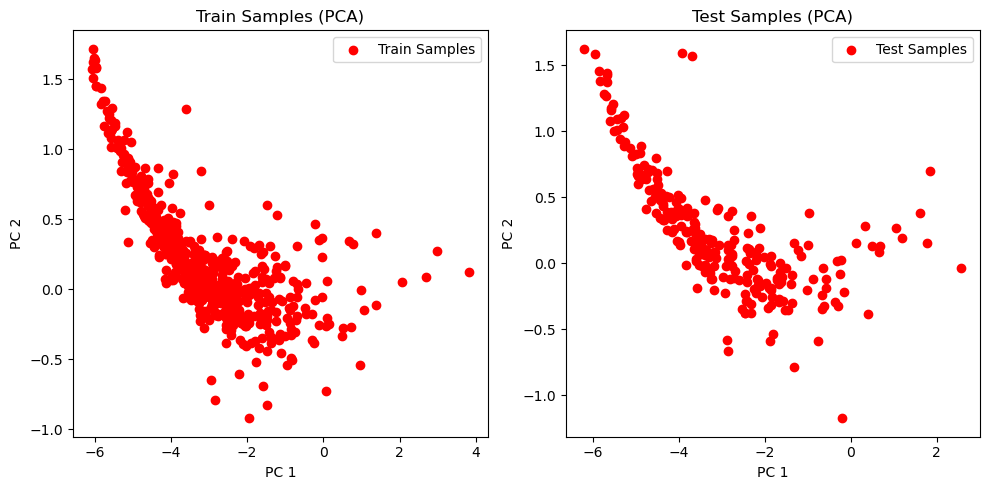

In [52]:
import matplotlib.pyplot as plt  
  
# 假设 data_pca_train 和 data_pca_test 已经是PCA降维后的数据，并且包含'PC 1', 'PC 2'两列  
# 这里我们不需要'target'列来绘图  
df_pca_train_young = df_pca_train[df_pca_train['target'] == 0]
df_pca_test_young = df_pca_test[df_pca_test['target'] == 0]

# 提取训练和测试数据的PCA成分  
train_pc1 = df_pca_train_young['PC 1']  
train_pc2 = df_pca_train_young['PC 2']  
test_pc1 = df_pca_test_young['PC 1']  
test_pc2 = df_pca_test_young['PC 2']  
  
# 绘制训练样本  
plt.figure(figsize=(10, 5))  
  
plt.subplot(1, 2, 1) # 图1（a）  
plt.scatter(train_pc1, train_pc2, color='red', label='Train Samples', marker='o')  
plt.title('Train Samples (PCA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 绘制测试样本  
plt.subplot(1, 2, 2) # 图1（b）  
plt.scatter(test_pc1, test_pc2, color='red', label='Test Samples', marker='o')  
plt.title('Test Samples (PCA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 显示图形  
plt.tight_layout()  
plt.show()

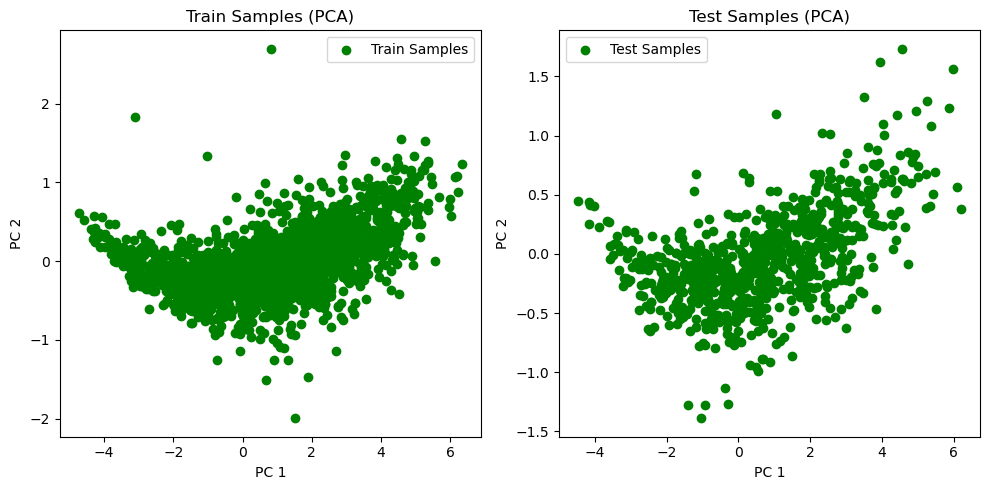

In [54]:
import matplotlib.pyplot as plt  
  
df_pca_train_young = df_pca_train[df_pca_train['target'] == 1]
df_pca_test_young = df_pca_test[df_pca_test['target'] == 1]

# 提取训练和测试数据的PCA成分  
train_pc1 = df_pca_train_young['PC 1']  
train_pc2 = df_pca_train_young['PC 2']  
test_pc1 = df_pca_test_young['PC 1']  
test_pc2 = df_pca_test_young['PC 2']  
  
# 绘制训练样本  
plt.figure(figsize=(10, 5))  
  
plt.subplot(1, 2, 1) # 图1（a）  
plt.scatter(train_pc1, train_pc2, color='green', label='Train Samples', marker='o')  
plt.title('Train Samples (PCA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 绘制测试样本  
plt.subplot(1, 2, 2) # 图1（b）  
plt.scatter(test_pc1, test_pc2, color='green', label='Test Samples', marker='o')  
plt.title('Test Samples (PCA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 显示图形  
plt.tight_layout()  
plt.show()

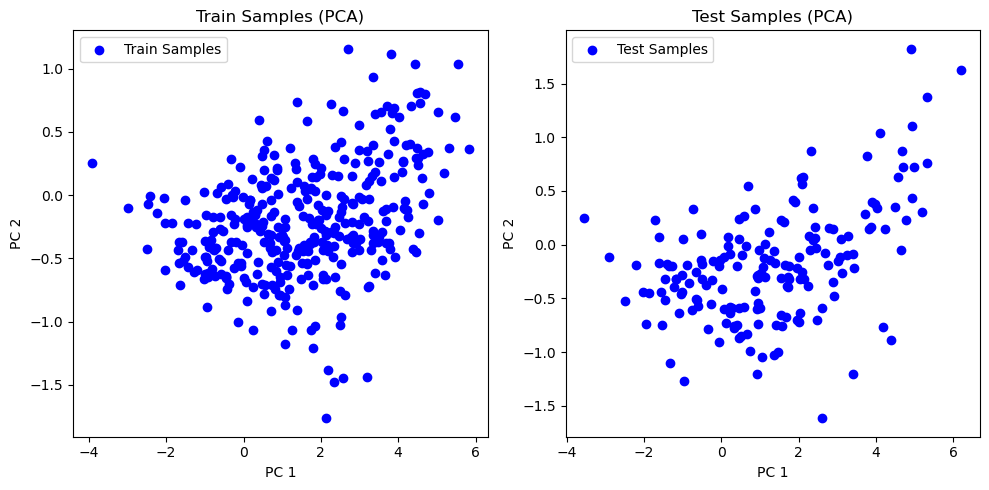

In [55]:
import matplotlib.pyplot as plt  
  
df_pca_train_young = df_pca_train[df_pca_train['target'] == 2]
df_pca_test_young = df_pca_test[df_pca_test['target'] == 2]

# 提取训练和测试数据的PCA成分  
train_pc1 = df_pca_train_young['PC 1']  
train_pc2 = df_pca_train_young['PC 2']  
test_pc1 = df_pca_test_young['PC 1']  
test_pc2 = df_pca_test_young['PC 2']  
  
# 绘制训练样本  
plt.figure(figsize=(10, 5))  
  
plt.subplot(1, 2, 1) # 图1（a）  
plt.scatter(train_pc1, train_pc2, color='blue', label='Train Samples', marker='o')  
plt.title('Train Samples (PCA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 绘制测试样本  
plt.subplot(1, 2, 2) # 图1（b）  
plt.scatter(test_pc1, test_pc2, color='blue', label='Test Samples', marker='o')  
plt.title('Test Samples (PCA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 显示图形  
plt.tight_layout()  
plt.show()

## kpca可视化

In [56]:
# 拆分数据集为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)  # 假设y是目标变量  

column_names = ['PC 1', 'PC 2']  
kpca = KernelPCA(n_components=2, kernel='sigmoid', gamma=1, coef0=10)#coef0是sigmoid函数的偏置项，影响函数形状。
#kpca = KernelPCA(n_components=2, kernel='poly', degree=6, gamma=1)
#kpca = KernelPCA(n_components=2, kernel='rbf', gamma=10)
data_kpca_train = kpca.fit_transform(X_train)
data_kpca_test = kpca.transform(X_test)

# 创建包含PCA结果和目标变量的DataFrame  
df_kpca_train = pd.DataFrame(data=data_kpca_train, columns=column_names)  
df_kpca_train['target'] = y_train.values  

df_kpca_test = pd.DataFrame(data=data_kpca_test, columns=column_names)  
df_kpca_test['target'] = y_test.values  
  
# 合并训练和测试集  
df_pca = pd.concat([df_kpca_train, df_kpca_test], axis=0)  
  
# 保存到CSV文件  
df_pca.to_csv('data_kpca.csv', index=False)

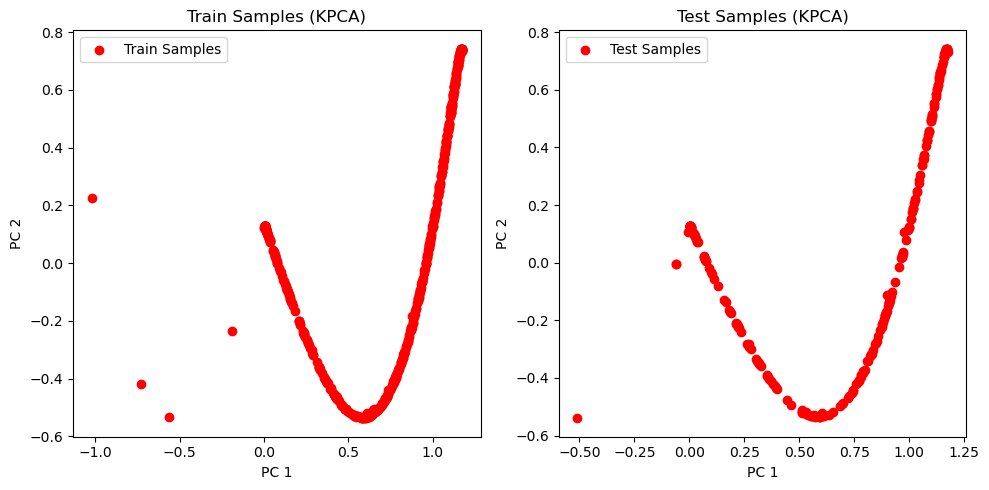

In [63]:
import matplotlib.pyplot as plt  
  
df_kpca_train_young = df_kpca_train[df_kpca_train['target'] == 0]
df_kpca_test_young = df_kpca_test[df_kpca_test['target'] == 0]

# 提取训练和测试数据的PCA成分  
train_pc1 = df_kpca_train_young['PC 1']  
train_pc2 = df_kpca_train_young['PC 2']  
test_pc1 = df_kpca_test_young['PC 1']  
test_pc2 = df_kpca_test_young['PC 2']  
  
# 绘制训练样本  
plt.figure(figsize=(10, 5))  
  
plt.subplot(1, 2, 1) # 图1（a）  
plt.scatter(train_pc1, train_pc2, color='red', label='Train Samples', marker='o')  
plt.title('Train Samples (KPCA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 绘制测试样本  
plt.subplot(1, 2, 2) # 图1（b）  
plt.scatter(test_pc1, test_pc2, color='red', label='Test Samples', marker='o')  
plt.title('Test Samples (KPCA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 显示图形  
plt.tight_layout()  
plt.show()

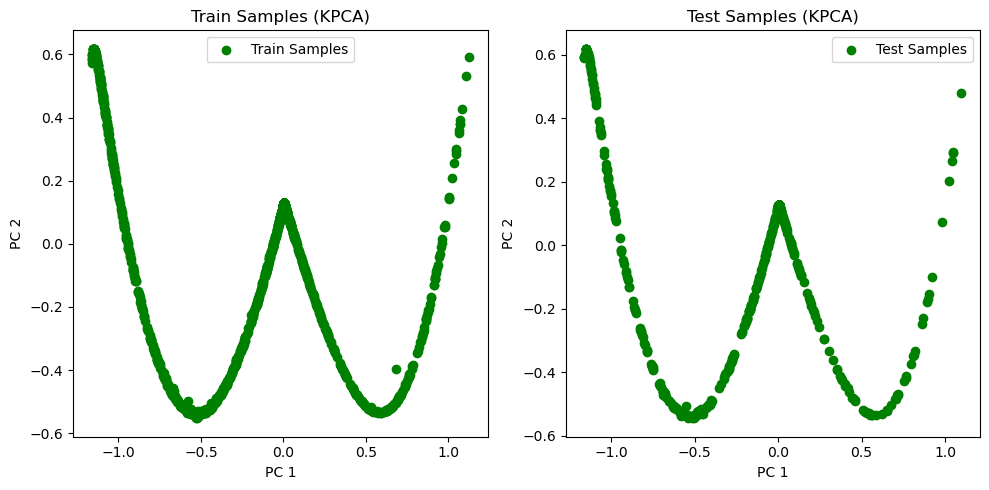

In [64]:
import matplotlib.pyplot as plt  
  
df_kpca_train_young = df_kpca_train[df_kpca_train['target'] == 1]
df_kpca_test_young = df_kpca_test[df_kpca_test['target'] == 1]

# 提取训练和测试数据的PCA成分  
train_pc1 = df_kpca_train_young['PC 1']  
train_pc2 = df_kpca_train_young['PC 2']  
test_pc1 = df_kpca_test_young['PC 1']  
test_pc2 = df_kpca_test_young['PC 2']  
  
# 绘制训练样本  
plt.figure(figsize=(10, 5))  
  
plt.subplot(1, 2, 1) # 图1（a）  
plt.scatter(train_pc1, train_pc2, color='green', label='Train Samples', marker='o')  
plt.title('Train Samples (KPCA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 绘制测试样本  
plt.subplot(1, 2, 2) # 图1（b）  
plt.scatter(test_pc1, test_pc2, color='green', label='Test Samples', marker='o')  
plt.title('Test Samples (KPCA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 显示图形  
plt.tight_layout()  
plt.show()

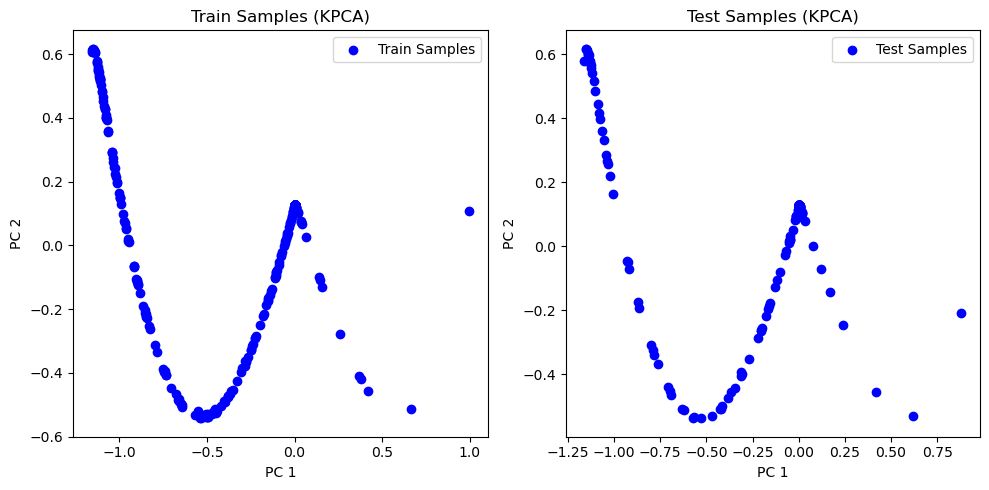

In [65]:
import matplotlib.pyplot as plt  
  
df_kpca_train_young = df_kpca_train[df_kpca_train['target'] == 2]
df_kpca_test_young = df_kpca_test[df_kpca_test['target'] == 2]

# 提取训练和测试数据的PCA成分  
train_pc1 = df_kpca_train_young['PC 1']  
train_pc2 = df_kpca_train_young['PC 2']  
test_pc1 = df_kpca_test_young['PC 1']  
test_pc2 = df_kpca_test_young['PC 2']  
  
# 绘制训练样本  
plt.figure(figsize=(10, 5))  
  
plt.subplot(1, 2, 1) # 图1（a）  
plt.scatter(train_pc1, train_pc2, color='blue', label='Train Samples', marker='o')  
plt.title('Train Samples (KPCA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 绘制测试样本  
plt.subplot(1, 2, 2) # 图1（b）  
plt.scatter(test_pc1, test_pc2, color='blue', label='Test Samples', marker='o')  
plt.title('Test Samples (KPCA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 显示图形  
plt.tight_layout()  
plt.show()

## lda可视化

In [67]:
# 拆分数据集为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)   

column_names = ['PC 1', 'PC 2']
lda_model = LDA()

data_lda_train = lda_model.fit_transform(X_train, y_train)
data_lda_test = lda_model.transform(X_test)

# 创建包含PCA结果和目标变量的DataFrame  
df_lda_train = pd.DataFrame(data=data_lda_train, columns=column_names)  
df_lda_train['target'] = y_train.values  

df_lda_test = pd.DataFrame(data=data_lda_test, columns=column_names)  
df_lda_test['target'] = y_test.values  
  
# 合并训练和测试集  
df_pca = pd.concat([df_lda_train, df_lda_test], axis=0)  
  
# 保存到CSV文件  
df_pca.to_csv('data_lda.csv', index=False)
print("降维后的LDA的解释方差比:", lda_model.explained_variance_ratio_)


降维后的LDA的解释方差比: [0.80982829 0.19017171]


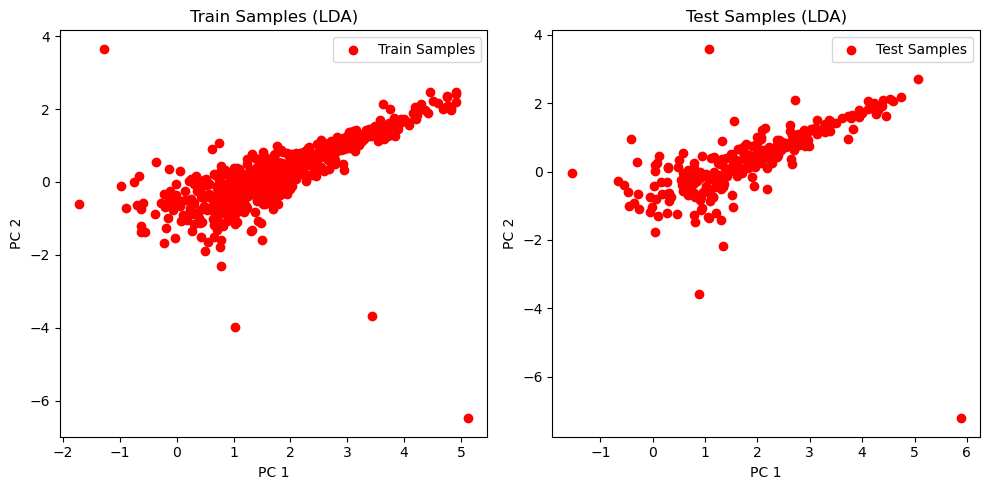

In [68]:
import matplotlib.pyplot as plt  
  
df_lda_train_young = df_lda_train[df_lda_train['target'] == 0]
df_lda_test_young = df_lda_test[df_lda_test['target'] == 0]

# 提取训练和测试数据的PCA成分  
train_pc1 = df_lda_train_young['PC 1']  
train_pc2 = df_lda_train_young['PC 2']  
test_pc1 = df_lda_test_young['PC 1']  
test_pc2 = df_lda_test_young['PC 2']  
  
# 绘制训练样本  
plt.figure(figsize=(10, 5))  
  
plt.subplot(1, 2, 1) # 图1（a）  
plt.scatter(train_pc1, train_pc2, color='red', label='Train Samples', marker='o')  
plt.title('Train Samples (LDA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 绘制测试样本  
plt.subplot(1, 2, 2) # 图1（b）  
plt.scatter(test_pc1, test_pc2, color='red', label='Test Samples', marker='o')  
plt.title('Test Samples (LDA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 显示图形  
plt.tight_layout()  
plt.show()

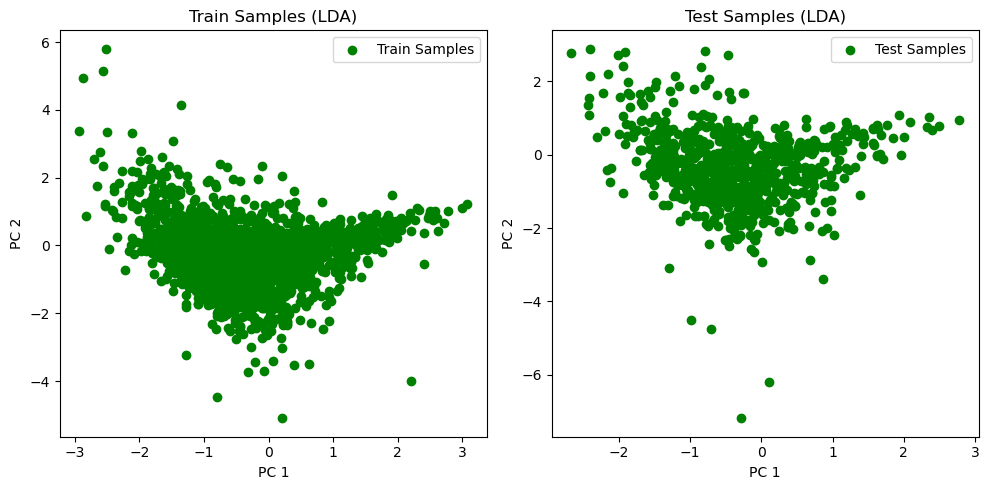

In [69]:
import matplotlib.pyplot as plt  
  
df_lda_train_young = df_lda_train[df_lda_train['target'] == 1]
df_lda_test_young = df_lda_test[df_lda_test['target'] == 1]

# 提取训练和测试数据的PCA成分  
train_pc1 = df_lda_train_young['PC 1']  
train_pc2 = df_lda_train_young['PC 2']  
test_pc1 = df_lda_test_young['PC 1']  
test_pc2 = df_lda_test_young['PC 2']  
  
# 绘制训练样本  
plt.figure(figsize=(10, 5))  
  
plt.subplot(1, 2, 1) # 图1（a）  
plt.scatter(train_pc1, train_pc2, color='green', label='Train Samples', marker='o')  
plt.title('Train Samples (LDA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 绘制测试样本  
plt.subplot(1, 2, 2) # 图1（b）  
plt.scatter(test_pc1, test_pc2, color='green', label='Test Samples', marker='o')  
plt.title('Test Samples (LDA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 显示图形  
plt.tight_layout()  
plt.show()

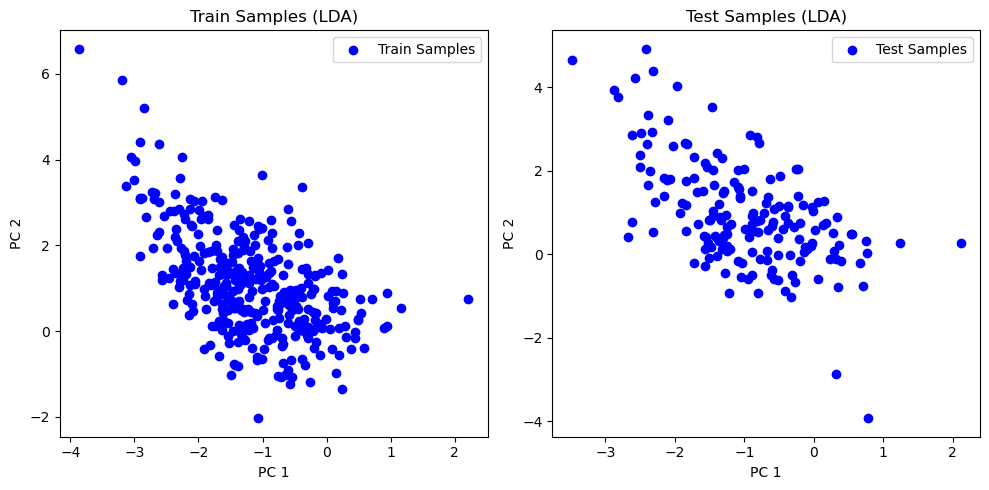

In [70]:
import matplotlib.pyplot as plt  
  
df_lda_train_young = df_lda_train[df_lda_train['target'] == 2]
df_lda_test_young = df_lda_test[df_lda_test['target'] == 2]

# 提取训练和测试数据的PCA成分  
train_pc1 = df_lda_train_young['PC 1']  
train_pc2 = df_lda_train_young['PC 2']  
test_pc1 = df_lda_test_young['PC 1']  
test_pc2 = df_lda_test_young['PC 2']  
  
# 绘制训练样本  
plt.figure(figsize=(10, 5))  
  
plt.subplot(1, 2, 1) # 图1（a）  
plt.scatter(train_pc1, train_pc2, color='blue', label='Train Samples', marker='o')  
plt.title('Train Samples (LDA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 绘制测试样本  
plt.subplot(1, 2, 2) # 图1（b）  
plt.scatter(test_pc1, test_pc2, color='blue', label='Test Samples', marker='o')  
plt.title('Test Samples (LDA)')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.legend()  
  
# 显示图形  
plt.tight_layout()  
plt.show()